# Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# EDA

In [55]:
df = pd.read_csv("weatherAUS.csv")

In [56]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [58]:
print(f" The data frame shape : {df.shape}")

 The data frame shape : (145460, 23)


In [59]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [60]:
# Converting the data column to a date type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

## Handling Missing Values

In [61]:
# Missing value check
(df.isna().sum()*100/len(df)).sort_values(ascending=False)

,0
Sunshine,48.009762
Evaporation,43.166506
Cloud3pm,40.807095
Cloud9am,38.421559
Pressure9am,10.356799
Pressure3pm,10.331363
WindDir9am,7.263853
WindGustDir,7.098859
WindGustSpeed,7.055548
Humidity3pm,3.098446


In [62]:
# Splitting the numerical and catigorical columns
num_cols  = df.select_dtypes("number").columns
cat_cols = df.select_dtypes("object").columns

In [63]:
# Using iterative imputer for numerical columns
iter_imputer = IterativeImputer(max_iter=20 , random_state=42)
df[num_cols] = iter_imputer.fit_transform(df[num_cols])

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [64]:
# Using simple imputer for catigorical columns
sim_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = sim_imputer.fit_transform(df[cat_cols])

In [65]:
# check the missing values
df.isna().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


## Handiling the outliers

In [66]:
# Checking for the outliers
def outlier_report(df):
        for col in num_cols:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR=Q3-Q1
                lower_bound = Q1-1.5*IQR
                upper_bound = Q3+1.5*IQR

                outlier_count = ((df[col]<lower_bound)|(df[col]>upper_bound)).sum()
                outlier_per = (outlier_count/len(df))*100
                print(f"{col} : {outlier_per.__round__(3)}")

outlier_report(df)

MinTemp : 0.045
MaxTemp : 0.377
Rainfall : 19.163
Evaporation : 2.363
Sunshine : 0.005
WindGustSpeed : 2.173
WindSpeed9am : 1.252
WindSpeed3pm : 1.741
Humidity9am : 0.984
Humidity3pm : 0.003
Pressure9am : 1.376
Pressure3pm : 1.098
Cloud9am : 0.0
Cloud3pm : 0.001
Temp9am : 0.234
Temp3pm : 0.602


Text(0.5, 1.05, 'Outlier Detection using Boxplots')

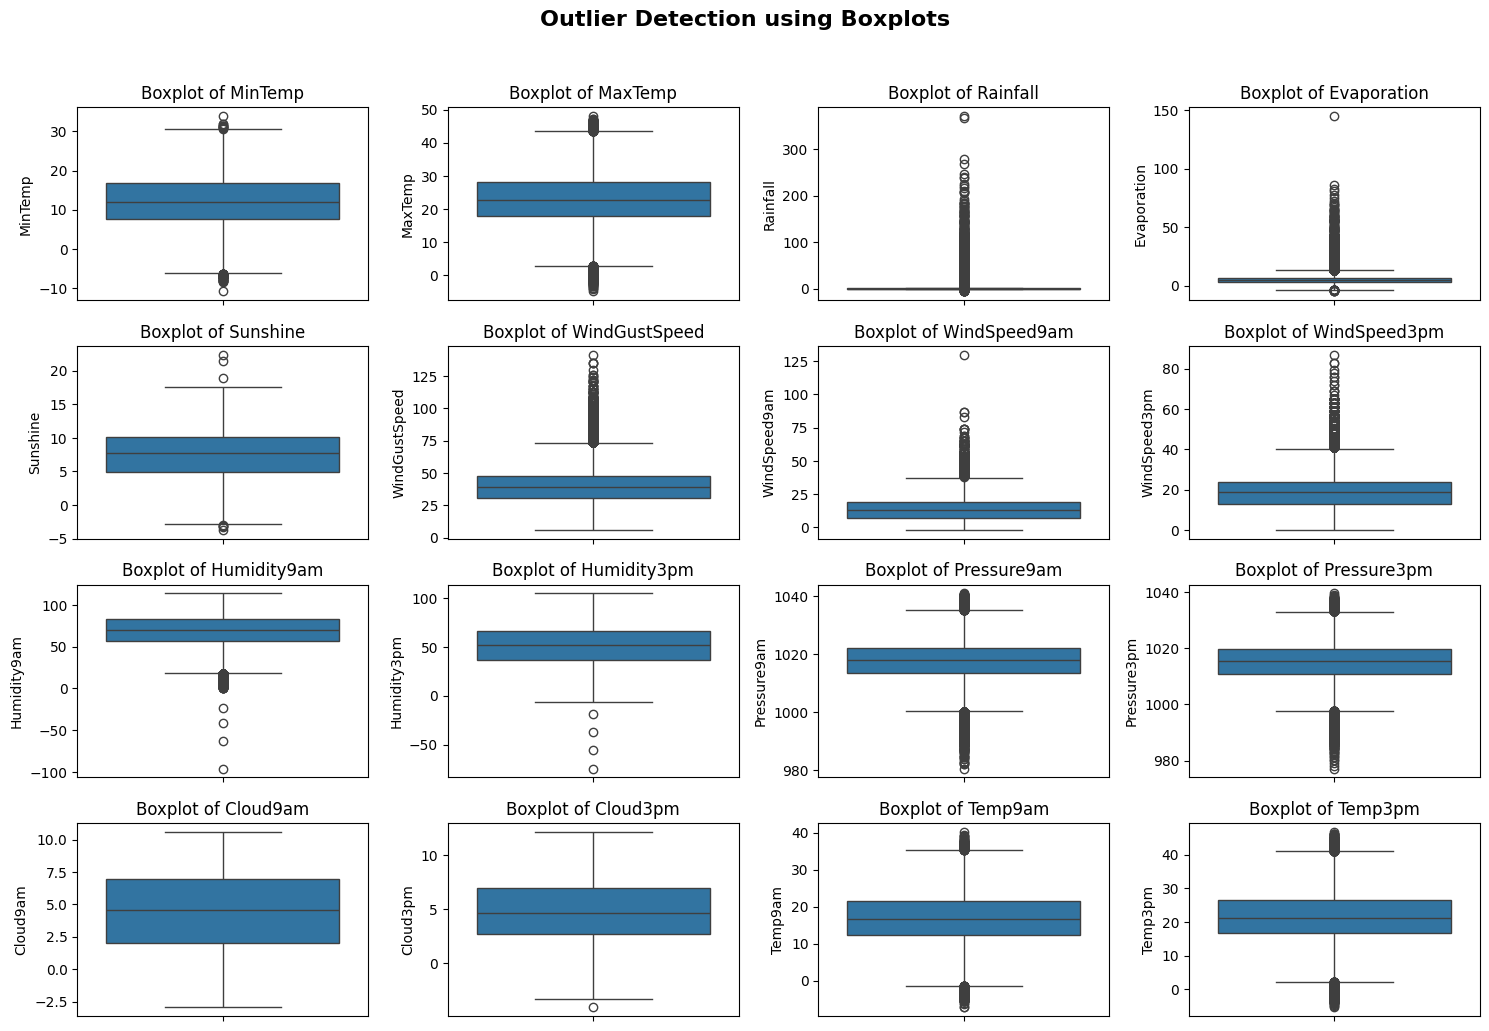

In [67]:
# Outliers visualization

plt.figure(figsize=(15, 12))

for i, feature in enumerate(num_cols, start=1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()

plt.suptitle("Outlier Detection using Boxplots", fontsize=16,fontweight="bold",y=1.05)

In [68]:
# Capping outliers
for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


In [69]:
outlier_report(df)

MinTemp : 0.0
MaxTemp : 0.0
Rainfall : 0.0
Evaporation : 0.0
Sunshine : 0.0
WindGustSpeed : 0.0
WindSpeed9am : 0.0
WindSpeed3pm : 0.0
Humidity9am : 0.0
Humidity3pm : 0.0
Pressure9am : 0.0
Pressure3pm : 0.0
Cloud9am : 0.0
Cloud3pm : 0.0
Temp9am : 0.0
Temp3pm : 0.0


## Handling Skewness

In [70]:
# Checking the skewness
def skewness (col):
    return df[col].skew().round(2)

for col in num_cols:
    print (f"{col} : {skewness(col)}")

MinTemp : 0.02
MaxTemp : 0.24
Rainfall : 1.14
Evaporation : 0.56
Sunshine : -0.29
WindGustSpeed : 0.57
WindSpeed9am : 0.51
WindSpeed3pm : 0.4
Humidity9am : -0.43
Humidity3pm : 0.02
Pressure9am : -0.04
Pressure3pm : -0.01
Cloud9am : -0.18
Cloud3pm : -0.14
Temp9am : 0.08
Temp3pm : 0.24


Text(0.5, 1.05, 'Distibution of values')

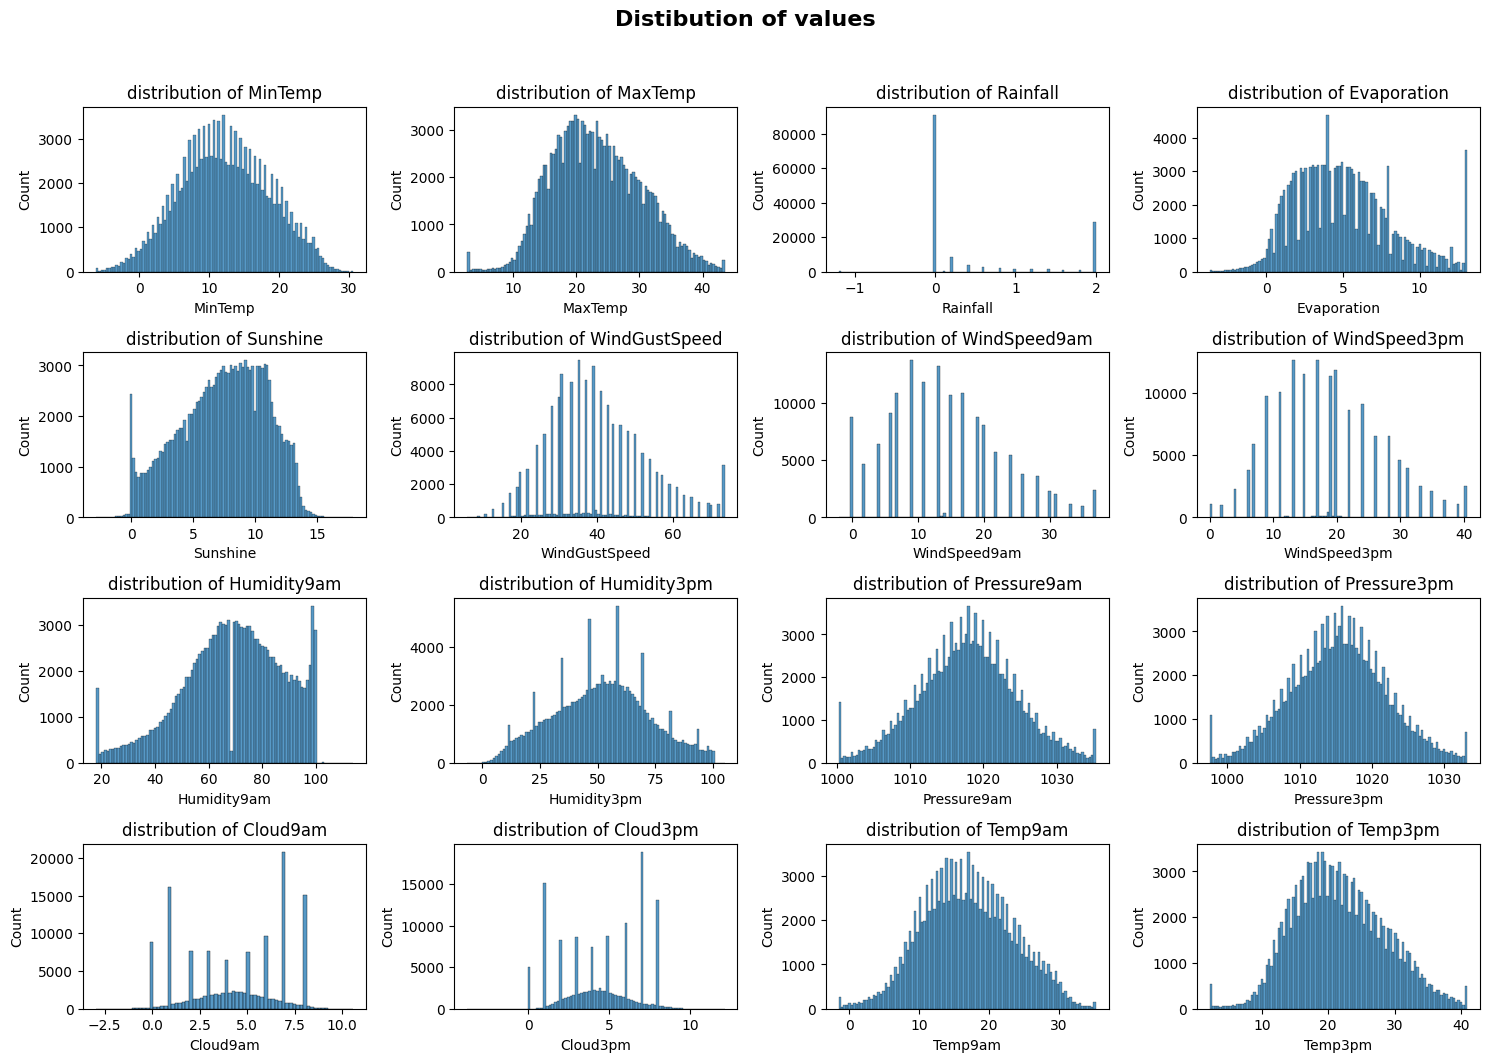

In [71]:
# skewness visulization
plt.figure(figsize=(15, 12))

for i, feature in enumerate(num_cols, start=1):
    plt.subplot(5, 4, i)
    sns.histplot(x=df[feature])
    plt.title(f"distribution of {feature}")
    plt.tight_layout()

plt.suptitle("Distibution of values", fontsize=16,fontweight="bold",y=1.05)

In [72]:
# Handling skewness using log transformation
for col in num_cols:
    if (np.abs(skewness(col)))>1:
        df[col] = np.log(1+np.abs(df[col]))
for col in num_cols:
    print (f"{col} : {skewness(col)}")

MinTemp : 0.02
MaxTemp : 0.24
Rainfall : 1.04
Evaporation : 0.56
Sunshine : -0.29
WindGustSpeed : 0.57
WindSpeed9am : 0.51
WindSpeed3pm : 0.4
Humidity9am : -0.43
Humidity3pm : 0.02
Pressure9am : -0.04
Pressure3pm : -0.01
Cloud9am : -0.18
Cloud3pm : -0.14
Temp9am : 0.08
Temp3pm : 0.24


## Date Engineering

In [73]:
# Separating the date into theree Columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.470004,6.274948,6.990089,W,44.0,W,...,1007.1,8.000000,5.150866,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.000000,6.260673,10.880762,WNW,44.0,NNW,...,1007.8,1.904206,2.631902,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.000000,8.583011,11.806953,WSW,46.0,W,...,1008.7,2.020694,2.000000,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.000000,6.831046,11.587394,NE,24.0,SE,...,1012.8,1.177196,1.966993,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,0.693147,7.359810,5.496714,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


In [74]:
# dropping the date column
df.drop("Date",axis=1,inplace=True)

In [75]:
# season extract func
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3,4,5]:
        return 'Autumn'
    elif month in [6,7,8]:
        return 'Winter'
    else:
        return 'Spring'

In [76]:
# applay func on dataframe
df['Season'] = df['Month'].apply(get_season)

In [77]:
#Temp Range = Max - Min
df['TempRange'] = df['MaxTemp'] - df['MinTemp']

In [78]:
#Average Wind Speed
df['AvgWindSpeed'] = (df['WindSpeed9am'] + df['WindSpeed3pm']) / 2

In [79]:
#Cloud & Temp Diff
df['CloudTempDiff'] = df['Cloud9am'] - df['Temp9am']
df['TempDiff'] = df['Temp3pm'] - df['Temp9am']

In [80]:
#checking
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainToday,RainTomorrow,Year,Month,Day,Season,TempRange,AvgWindSpeed,CloudTempDiff,TempDiff
0,Albury,13.4,22.9,0.470004,6.274948,6.990089,W,44.0,W,WNW,...,No,No,2008,12,1,Summer,9.5,22.0,-8.900000,4.9
1,Albury,7.4,25.1,0.000000,6.260673,10.880762,WNW,44.0,NNW,WSW,...,No,No,2008,12,2,Summer,17.7,13.0,-15.295794,7.1
2,Albury,12.9,25.7,0.000000,8.583011,11.806953,WSW,46.0,W,WSW,...,No,No,2008,12,3,Summer,12.8,22.5,-18.979306,2.2
3,Albury,9.2,28.0,0.000000,6.831046,11.587394,NE,24.0,SE,E,...,No,No,2008,12,4,Summer,18.8,10.0,-16.922804,8.4
4,Albury,17.5,32.3,0.693147,7.359810,5.496714,W,41.0,ENE,NW,...,No,No,2008,12,5,Summer,14.8,13.5,-10.800000,11.9


## Visualization

<Axes: >

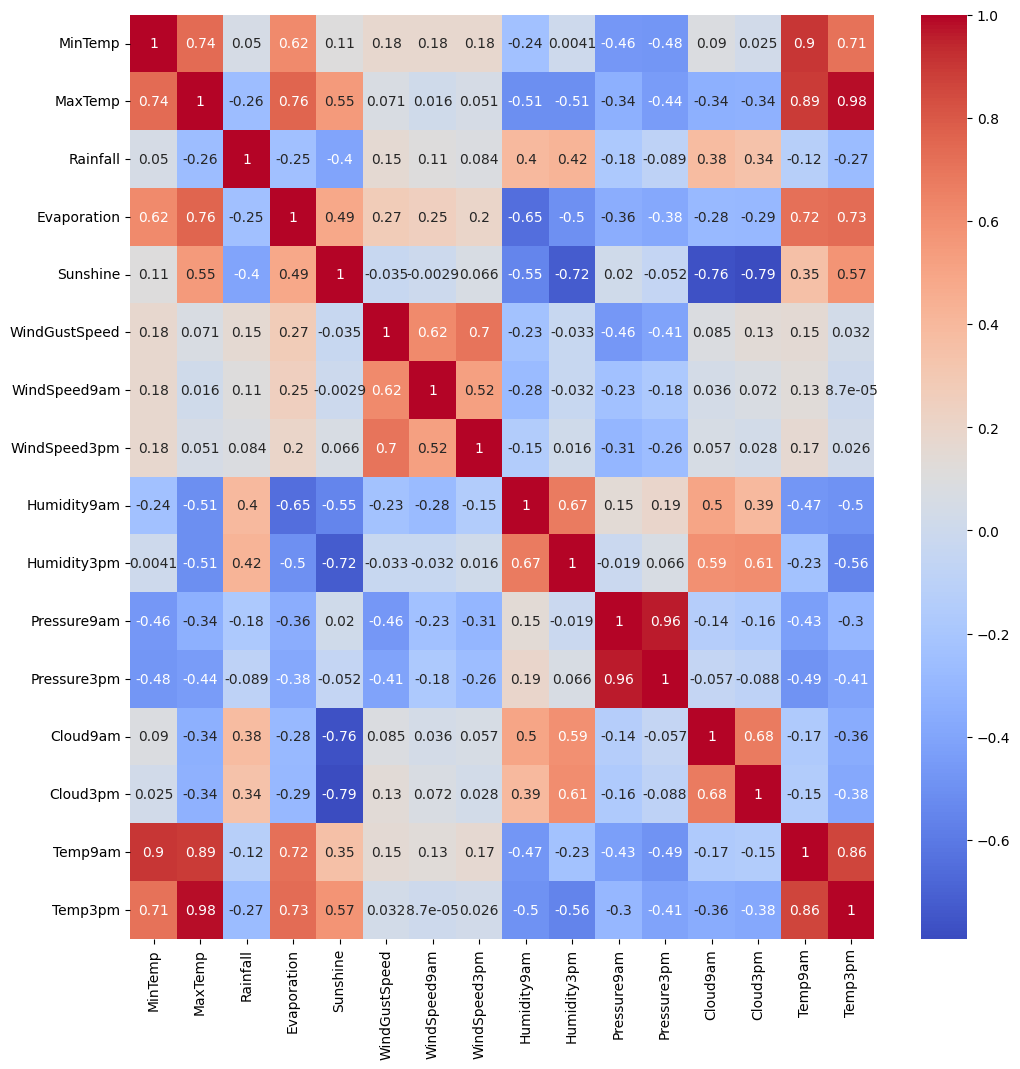

In [81]:
plt.figure(figsize=(12,12))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")

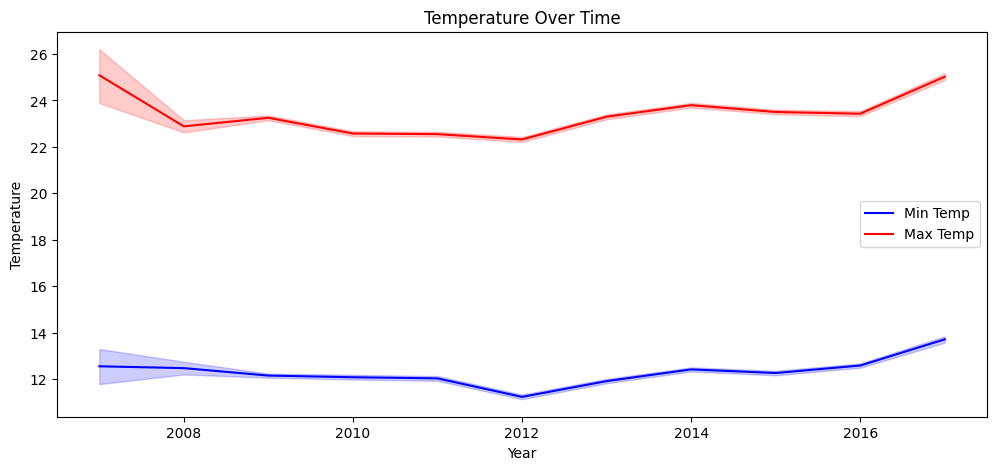

In [82]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Year', y='MinTemp', label='Min Temp', color='blue')
sns.lineplot(data=df, x='Year', y='MaxTemp', label='Max Temp', color='red')
plt.title('Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

**Temprature is increasing over the time**

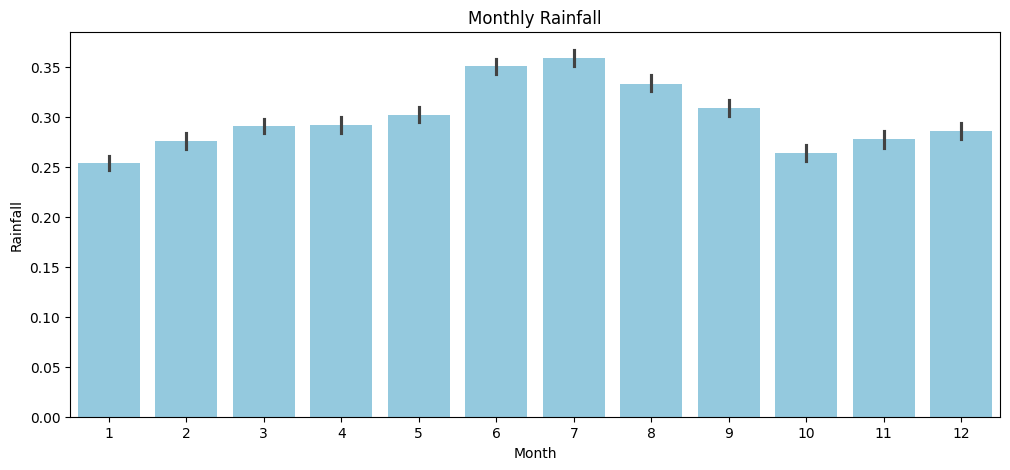

In [83]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Month', y='Rainfall', color='skyblue')
plt.title('Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.show()

**June , July and August has the highest rainfall rate**

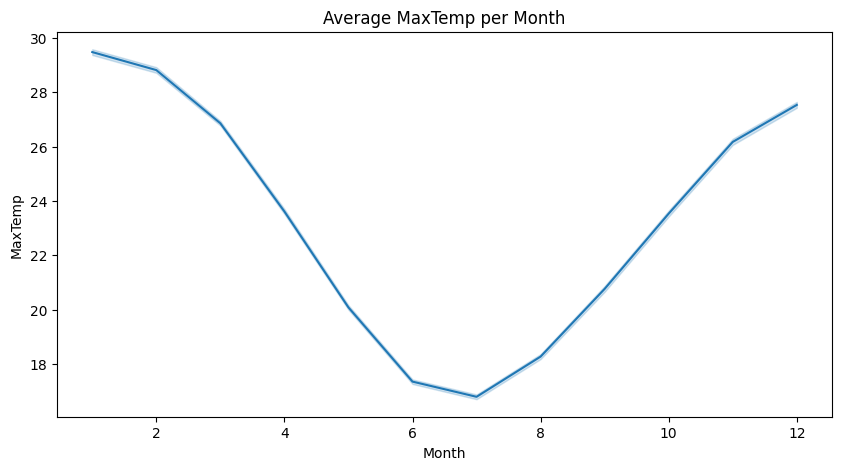

In [84]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Month", y="MaxTemp", estimator="mean")
plt.title("Average MaxTemp per Month")
plt.show()

**June , July and August that has the most rainfall has the least tempratures**

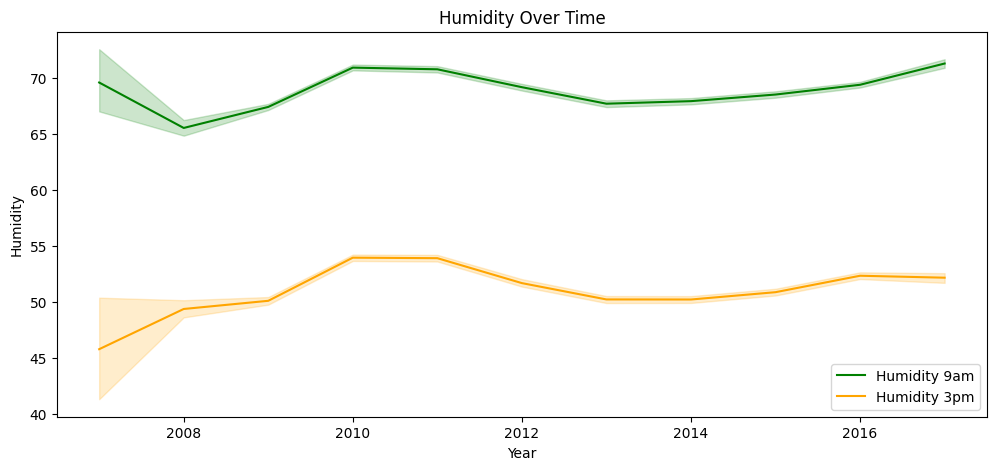

In [85]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Year', y='Humidity9am', label='Humidity 9am', color='green')
sns.lineplot(data=df, x='Year', y='Humidity3pm', label='Humidity 3pm', color='orange')
plt.title('Humidity Over Time')
plt.xlabel('Year')
plt.ylabel('Humidity')
plt.show()

**Humidity is increasing over the years**  
**Humidity in the morining is higher than at the afternoon**

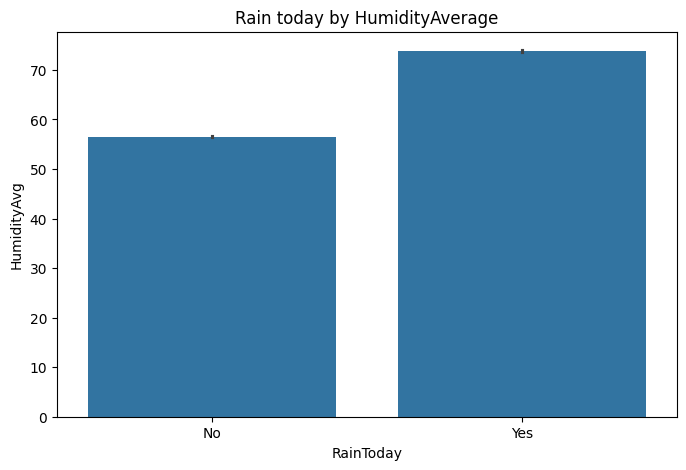

In [86]:
df['HumidityAvg']=df[['Humidity9am','Humidity3pm']].mean(axis=1)
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="RainToday", y="HumidityAvg", dodge=False, legend=False)
plt.xlabel("RainToday")
plt.ylabel("HumidityAvg")
plt.title("Rain today by HumidityAverage")
plt.show()

**Direct relationship between humidity and raining**

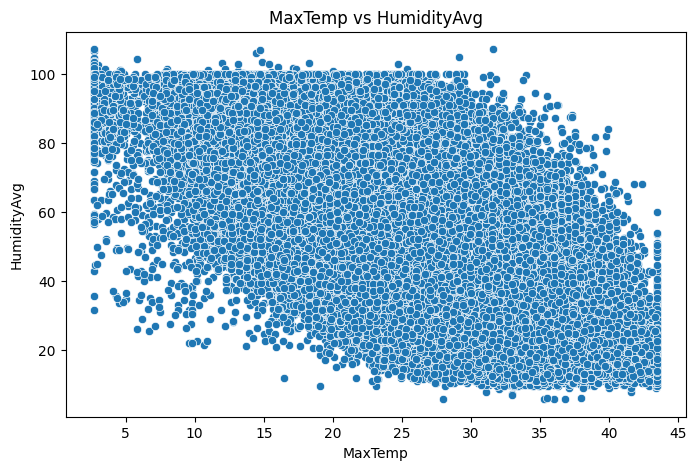

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="MaxTemp", y="HumidityAvg")
plt.title("MaxTemp vs HumidityAvg")
plt.show()


**Reverse relationship between temprature and humidity**

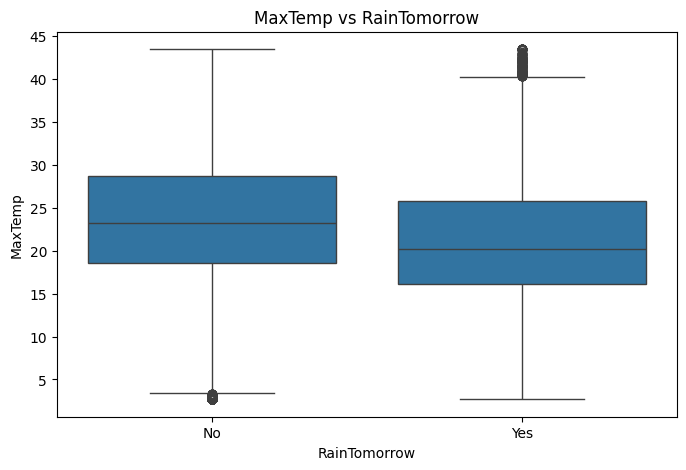

In [88]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="RainTomorrow", y="MaxTemp")
plt.title("MaxTemp vs RainTomorrow")
plt.show()


**Rainy days has less temprature than the others**

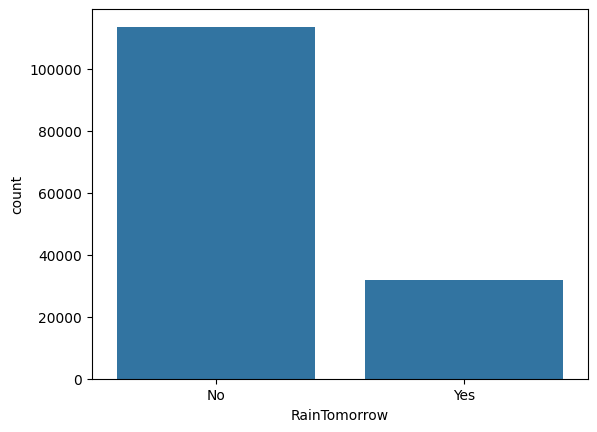

In [89]:
sns.countplot(data=df, x="RainTomorrow")
plt.show()

**Most days aren't rainy**

In [90]:
top_10 = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False).head(10).reset_index()

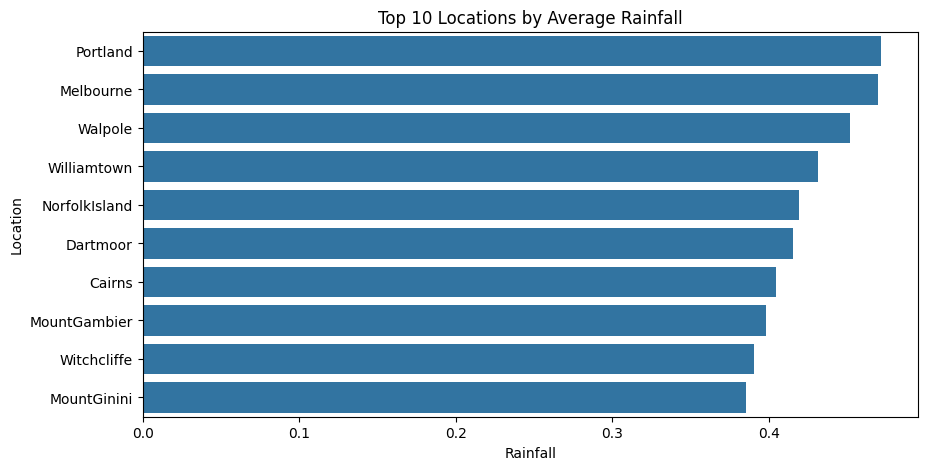

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_10, x='Rainfall', y='Location')
plt.title("Top 10 Locations by Average Rainfall")
plt.show()

## Data splitting


In [92]:
#Data splitting

x = df.drop('RainTomorrow',axis=1)
y= df['RainTomorrow']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=42)

## Encoding

In [93]:
for col in cat_cols:
    print(f"{col} : {df[col].nunique()}")

Location : 49
WindGustDir : 16
WindDir9am : 16
WindDir3pm : 16
RainToday : 2
RainTomorrow : 2


Most of the columns have large number of values so one hot encoding won't be the best choise

In [94]:
# Using frequancy encoding for location column
location_freq = df['Location'].value_counts()/len(df)
df['location'] = df['Location'].map(location_freq)
df.drop('Location',axis=1,inplace=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Year,Month,Day,Season,TempRange,AvgWindSpeed,CloudTempDiff,TempDiff,HumidityAvg,location
0,13.4,22.900000,0.470004,6.274948,6.990089,W,44.000000,W,WNW,20.0,...,2008,12,1,Summer,9.500000,22.0,-8.900000,4.9,46.5,0.020899
1,7.4,25.100000,0.000000,6.260673,10.880762,WNW,44.000000,NNW,WSW,4.0,...,2008,12,2,Summer,17.700000,13.0,-15.295794,7.1,34.5,0.020899
2,12.9,25.700000,0.000000,8.583011,11.806953,WSW,46.000000,W,WSW,19.0,...,2008,12,3,Summer,12.800000,22.5,-18.979306,2.2,34.0,0.020899
3,9.2,28.000000,0.000000,6.831046,11.587394,NE,24.000000,SE,E,11.0,...,2008,12,4,Summer,18.800000,10.0,-16.922804,8.4,30.5,0.020899
4,17.5,32.300000,0.693147,7.359810,5.496714,W,41.000000,ENE,NW,7.0,...,2008,12,5,Summer,14.800000,13.5,-10.800000,11.9,57.5,0.020899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.000000,5.332709,10.511856,E,31.000000,SE,ENE,13.0,...,2017,6,21,Winter,20.600000,12.0,-8.624064,12.3,37.5,0.010848
145456,3.6,25.300000,0.000000,5.384859,11.266939,NNW,22.000000,SE,N,13.0,...,2017,6,22,Winter,21.700000,11.0,-9.604949,13.6,38.5,0.010848
145457,5.4,26.900000,0.000000,6.259216,10.457639,N,37.000000,SE,WNW,9.0,...,2017,6,23,Winter,21.500000,9.0,-10.763233,13.6,38.5,0.010848
145458,7.8,27.000000,0.000000,6.751559,10.542217,SE,28.000000,SSE,N,13.0,...,2017,6,24,Winter,19.200000,10.0,-12.100000,10.9,37.5,0.010848


In [95]:
# label encoding for the rest of catigorical columns
cat_cols = x_train.select_dtypes('object').columns
for col in cat_cols:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Year,Month,Day,Season,TempRange,AvgWindSpeed,CloudTempDiff,TempDiff,HumidityAvg,location
0,13.4,22.900000,0.470004,6.274948,6.990089,W,44.000000,W,WNW,20.0,...,2008,12,1,Summer,9.500000,22.0,-8.900000,4.9,46.5,0.020899
1,7.4,25.100000,0.000000,6.260673,10.880762,WNW,44.000000,NNW,WSW,4.0,...,2008,12,2,Summer,17.700000,13.0,-15.295794,7.1,34.5,0.020899
2,12.9,25.700000,0.000000,8.583011,11.806953,WSW,46.000000,W,WSW,19.0,...,2008,12,3,Summer,12.800000,22.5,-18.979306,2.2,34.0,0.020899
3,9.2,28.000000,0.000000,6.831046,11.587394,NE,24.000000,SE,E,11.0,...,2008,12,4,Summer,18.800000,10.0,-16.922804,8.4,30.5,0.020899
4,17.5,32.300000,0.693147,7.359810,5.496714,W,41.000000,ENE,NW,7.0,...,2008,12,5,Summer,14.800000,13.5,-10.800000,11.9,57.5,0.020899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.000000,5.332709,10.511856,E,31.000000,SE,ENE,13.0,...,2017,6,21,Winter,20.600000,12.0,-8.624064,12.3,37.5,0.010848
145456,3.6,25.300000,0.000000,5.384859,11.266939,NNW,22.000000,SE,N,13.0,...,2017,6,22,Winter,21.700000,11.0,-9.604949,13.6,38.5,0.010848
145457,5.4,26.900000,0.000000,6.259216,10.457639,N,37.000000,SE,WNW,9.0,...,2017,6,23,Winter,21.500000,9.0,-10.763233,13.6,38.5,0.010848
145458,7.8,27.000000,0.000000,6.751559,10.542217,SE,28.000000,SSE,N,13.0,...,2017,6,24,Winter,19.200000,10.0,-12.100000,10.9,37.5,0.010848


## Scaling

In [96]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Year,Month,Day,Season,TempRange,AvgWindSpeed,CloudTempDiff,TempDiff,HumidityAvg,location
0,13.4,22.9,0.470004,6.274948,6.990089,W,44.0,W,WNW,20.0,...,2008,12,1,Summer,9.5,22.0,-8.900000,4.9,46.5,0.020899
1,7.4,25.1,0.000000,6.260673,10.880762,WNW,44.0,NNW,WSW,4.0,...,2008,12,2,Summer,17.7,13.0,-15.295794,7.1,34.5,0.020899
2,12.9,25.7,0.000000,8.583011,11.806953,WSW,46.0,W,WSW,19.0,...,2008,12,3,Summer,12.8,22.5,-18.979306,2.2,34.0,0.020899
3,9.2,28.0,0.000000,6.831046,11.587394,NE,24.0,SE,E,11.0,...,2008,12,4,Summer,18.8,10.0,-16.922804,8.4,30.5,0.020899
4,17.5,32.3,0.693147,7.359810,5.496714,W,41.0,ENE,NW,7.0,...,2008,12,5,Summer,14.8,13.5,-10.800000,11.9,57.5,0.020899


## Handling Imblance

<Axes: xlabel='RainTomorrow', ylabel='count'>

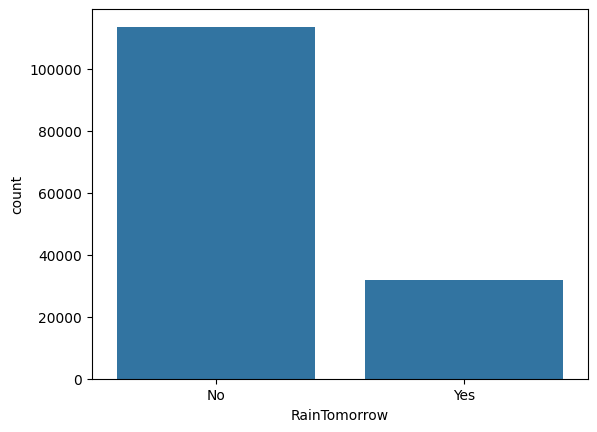

In [97]:
# Class imbalance visualization
sns.countplot(x=df['RainTomorrow'])

In [98]:
# Handling imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train_s, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: RainTomorrow
No     90911
Yes    25457
Name: count, dtype: int64
After SMOTE: RainTomorrow
Yes    90911
No     90911
Name: count, dtype: int64


## Modeling

In [99]:
# try random forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
# fitting
rf_model.fit(x_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42)

In [100]:
# prediction
y_pred = rf_model.predict(x_test_s)
y_prob = rf_model.predict_proba(x_test_s)[:,1]  # prob of Yes

Accuracy: 0.8456964113845731


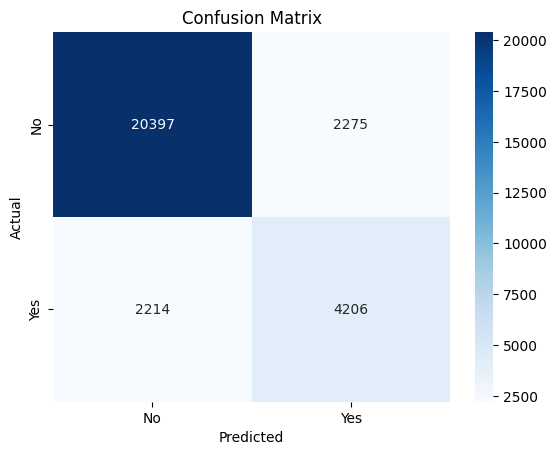

              precision    recall  f1-score   support

          No       0.90      0.90      0.90     22672
         Yes       0.65      0.66      0.65      6420

    accuracy                           0.85     29092
   macro avg       0.78      0.78      0.78     29092
weighted avg       0.85      0.85      0.85     29092

ROC-AUC: 0.8862390748630888


In [101]:
# Evaluation
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
roc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc)